![mobydick](mobydick.jpg)

In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

In [92]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('stopwords')
import pandas as pd

# Start coding here... 

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# Request the Moby Dick HTML file
r = requests.get("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

# Encoding it to utf-8
r.encoding = "utf-8"

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

In [94]:
# Extract the HTML and create a BeautifulSoup object
html_soup = BeautifulSoup(html, "html.parser")

moby_text = html_soup.get_text()
type(html_soup)

bs4.BeautifulSoup

In [95]:
import nltk
from bs4 import BeautifulSoup

# Ensure the necessary NLTK data is downloaded
nltk.download('stopwords')

# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(moby_text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']


[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']


In [97]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])
print(sw)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all']
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselve

In [98]:
# A new list to hold Moby Dick with No Stop words
words_no_stop = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_no_stop.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_no_stop[:5])

['moby', 'dick', 'whale', 'herman', 'melville']


In [99]:
# Initialize a Counter object
count = Counter(words_no_stop)

# Ten most common words, saving the result to top_ten
top_ten = count.most_common(10)

# Printing top 10
print(dict(top_ten))

{'whale': 1246, 'one': 925, 'like': 647, 'upon': 568, 'man': 527, 'ship': 519, 'ahab': 517, 'ye': 473, 'sea': 455, 'old': 452}


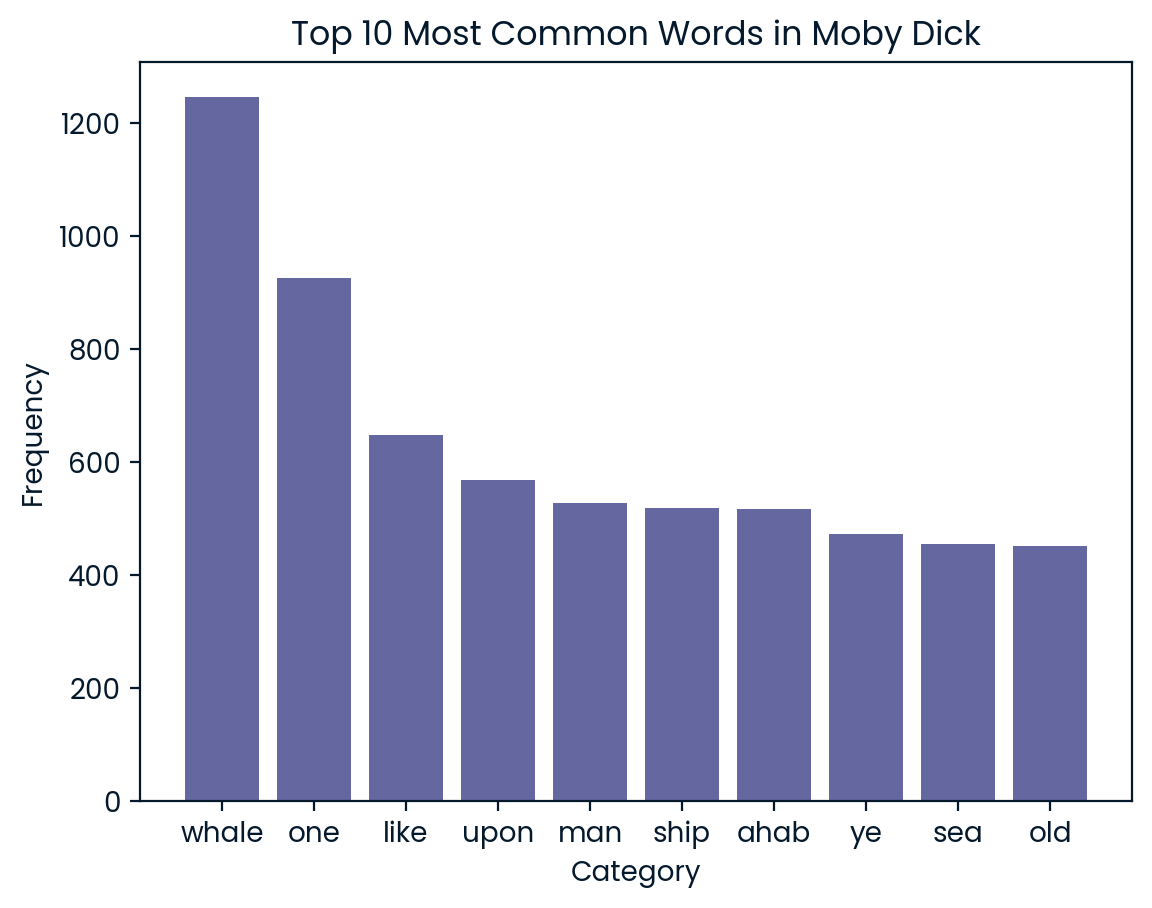

In [100]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

# Assuming top_ten is a list of tuples, convert it to a dictionary
top_ten_dict = dict(top_ten)

# Convert the dictionary to a DataFrame
plot_top_ten = pd.DataFrame(list(top_ten_dict.items()), columns=['Category', 'Frequency'])

# Generate a frequency graph
plt.bar(plot_top_ten['Category'], plot_top_ten['Frequency'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Moby Dick')
plt.show()